# 2.5 Local Methods in High Dimensions

We have examined two learning techniques for prediction so far: the stable
but biased linear model and the less stable but apparently less biased class
of k-nearest-neighbor estimates. It would seem that with a reasonably large
set of training data, we could always approximate the theoretically optimal
conditional expectation by k-nearest-neighbor averaging, since we should
be able to find a fairly large neighborhood of observations close to any x
and average them. This approach and our intuition breaks down in high
dimensions, and the phenomenon is commonly referred to as the __curse
of dimensionality__ (Bellman, 1961).

__Warning__: This is a hard topic but it is worth understanding it. 

## Build up the intuition for high dimensions

We will generate a dataset randomly for:

* one dimension: $x \in N(0, 3)$
* two dimension: $X \in N(0, \Sigma)$, where $\Sigma  = \begin{bmatrix} 3 &  0 \\ 0 &  3 \end{bmatrix}$

We want to understand: __how sparse it can go when dimension grows__. 

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
from ch2_osl import OverviewSL
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

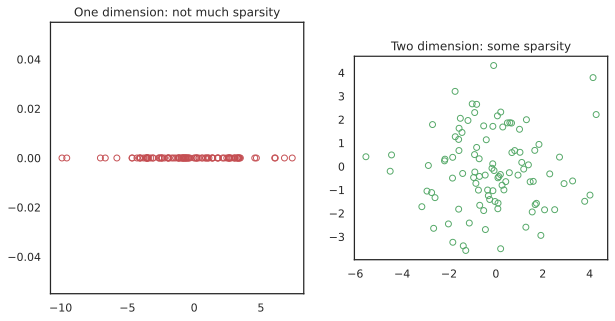

In [3]:
osl = OverviewSL()
osl.plot_sparsity()

The above figure illustrates our data is more sparse in the higher dimension
_when the sample size is same ($n=100$ in this case)_. The other side of __the
same coin__ is that the sampling density is alwasy small in high dimensions. Let's
define the sampling denstiy as the approximate number of points on each line
of lenght one. For example in 1d sampling density of 5 looks like this: 

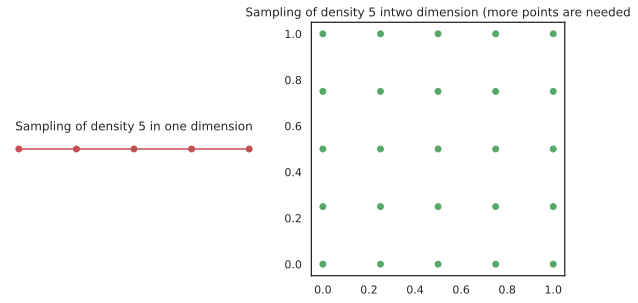

In [3]:
osl.plot_denstity_example()

## Volume of neighborhood

After having some intuition about sparsity and density in the space. We will 
try to understand what could go wrong in the high dimension. In __three__ dimension, 
the volume of cube with unit length $r$ is:

$$V(r) = r^3$$

In the $p$-dimension, the volume __hypercube__ with unit lenght $r$ is:

$$V(r) = r^p$$

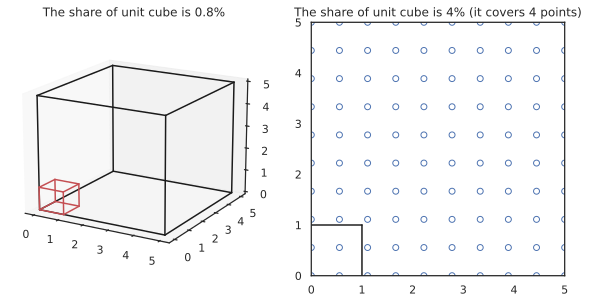

In [107]:
osl.plot_cube()

The above figure is _very important_. when you check the share of space that each unit take 
in different dimension, we have:

* $S(\text{two-dimension}) = \frac{1}{5\times5} = 0.04 = 4%$
* $S(\text{three-dimension} = \frac{1}{5 \times 5 \times 5} = 0.008 = 0.8%$

It seems that one standard unit takes a larger share in the two dimension.
However, things change dramatically when we try to _calculate the share of 
each unit and its nearest neighbors_. 

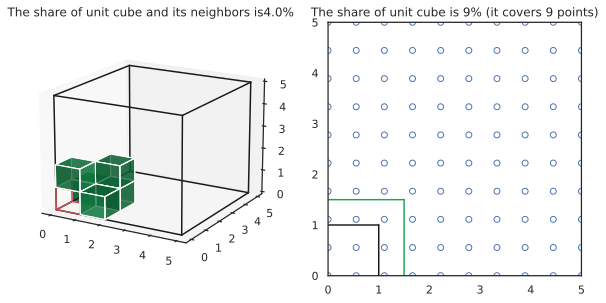

In [115]:
osl.plot_cube_neighbors()

For the three dimension, we see the growth:

* $0.8\% \to 3.2\%$, it __grows 5 times__
* $4\% \to 9\%$, it __grows 2.25 times__

Now, assume that we have 1000 points that are uniformly distributed in the
hypercube of $p$-dimenson. Suppose we want to make predictions around the original
point $[0, 0, \cdots, 0]$, we need to create a cubic neighborhood around
this point to capture the fraction of $r$ of the observations.

In our case $r=1/100$, so that we have $1000/100=10$ points in the cube (cube
in the high dimension) to have reasonaable averaging like we did in
k-nearest-neighborhood. What is the __edge-length__ of this cube in $p$-dimension?

It is: 

$$e_p(r) = r^{1/p}$$

Because the volume of this neighborhood is $r$ when the sample is uniformly 
distributed ($(r^{1/p})^p = r$). 

In ten dimensions $e_{10}(0.01)=$ $0.63$ and $e_{10}(0.1)=0.80$, while the entire range for each input is only 1.0. So to capture $1 \%$ or $10 \%$ of the data 
to form a local average, we must cover $63 \%$ or $80 \%$ of the range of 
each input variable. Such neighborhoods are no longer "local." Reducing 
the fraction of sample $r$ dramatically does not help much either, 
since the fewer observations we average, the higher is the 
variance of our fit.

| sample covered | edge-length                             |
|----------------|-----------------------------------------|
| 1%             | 63% of the range of each input variable |
| 10%            | 80% of the range of each input variable |
| 20%            | 85% of the range of each input variable |

__Remark__: curse of dimensionality


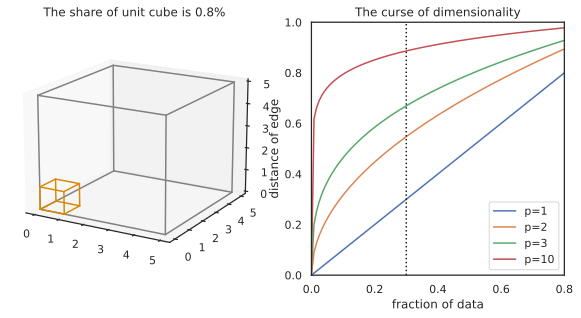

In [4]:
osl.plot_dimension_curse()

The above figure shows that to get a fraction of data, the edge we need to cover
grows exponetially. This means that __local methods__ like k-nearest-neighborhood
is not working __locally__. Or you can also understand another way around. 

Take for example a hypercube with side length equal to 1 , in an $p$-dimensional 
space. The volume of the hypercube ist 1 . If we want to allocate that volume 
among $N$ smaller cubes (each containing a data point) distributed more or 
less homogeneously in the p-dimensional hypercube, each small cube will 
have a volume equal to $1 / N$. Their side length $d$ would be
$$
d=\left(\frac{1}{N}\right)^{(1 / p)}
$$
For a finite $N, d$ converges to 1 when $p$ goes to infinity(as it shows
in the above figure). That is, __the new smaller cubes have each "almost" the 
same volume as the bigger cube__, which means every cube is the same cube or
all local cubes become the same one. 

### A Concrete Example

Suppose we have 1000 training examples $x_i$ generated uniformly on $[−1, 1]^p$ . Assume that the true relationship between X and Y is

$$Y=f(X) = e^{-8||X||^2}$$

without any measurement error. We use the 1-nearest-neighbor rule to predict $y_0$ at the test-point $x_0 = 0$.

$$
\begin{aligned}
 \text{MSE}(x_0) & = E_\tau[f(x_0) - \hat{y_0}]^2\\
 & = E_\tau[(f(x_0) - E_\tau(\hat{y_0})) + (E_\tau(\hat{y_0}) - \hat{y_0})]^2\\
 & = E_\tau[(E_\tau(\hat{y_0}) - \hat{y_0})^2  + 2(f(x_0) - E_\tau(\hat{y_0}))(E_\tau(\hat{y_0}) - \hat{y_0})+ (f(x_0) - E_\tau(\hat{y_0}))^2]\\
 & = E_\tau[(E_\tau(\hat{y_0}) - \hat{y_0})^2] + E_\tau[(E_\tau(\hat{y_0}) - f(x_0))^2]\\
 & = E_\tau[\hat{y_0} - E_\tau(\hat{y_0})]^2 + [E_\tau(\hat{y_0}) - f(x_0)]^2\\
 & = Var_\tau(\hat{y_0}) + Bias^2(\hat{y_0})
\end{aligned}
$$


We have broken down the MSE into two components that will become familiar as we proceed: variance and squared bias. Such a decomposition is always possible and often useful, and is known as the __bias–variance decomposition__.

    The expected prediction error = variance of estimation + bias

he variance term measures the variability of our estimate based on
the sample data. The squared bias term measures how far the expected value of our estimator is from the truth.


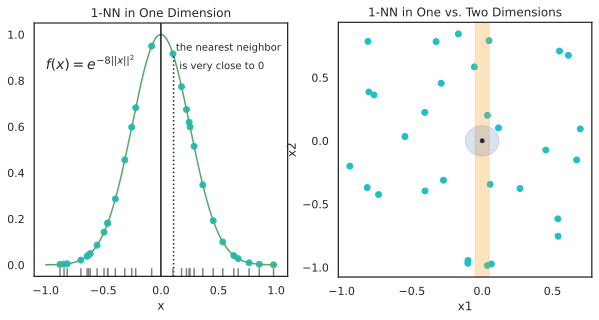

In [5]:
np.random.seed(777)
osl.plot_simulated_data_2_7_1()

Based on the above figure, the bias is very small for $p=1$ (dimension = 1), however the bias increases quickly with dimension because the distance to the nearest neighbor increases. 

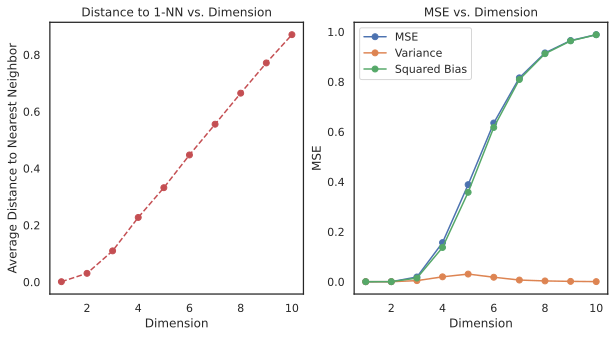

In [6]:
np.random.seed(789)
osl.plot_simulated_data_2_7_2()

By $p = 10$, for more than 99% of the samples the nearest neighbor is a distance greater than 0.5 from the origin. Thus as p increases, the estimate tends to be 0 more often than not, and hence the MSE levels off at 1.0, as does the bias, and the variance starts dropping (an artifact of this example). 

Therefore, __k-nearest-neighborhood has high bias for the high dimension data__.
it is not accurate and also unstable for the high dimension. 

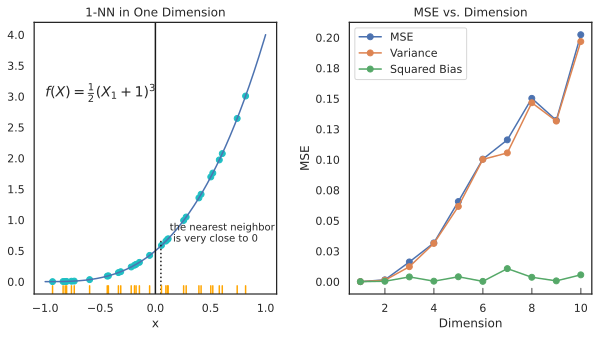

In [7]:
np.random.seed(999)
osl = OverviewSL()
osl.plot_simulated_data_2_8()

The dependence of the bias term on distance depends on the truth, and it need not 
always dominate with 1-nearest neighbor. For example, if the function always 
involves only a few dimensions as in the above figure, then the variance can dominate instead.

__Take Away__:

* assume a truth function $Y=f(X)$, we generate the dataset
* by estimating $Y$ with k-nearest-neighborhood method, we showed:
    - local methods do not work well in high dimensions
    - bias could be either domianted by squared bias or variance


__Linear Regression in High Dimensions__ 

Assume that the relationship between X and Y is: 

$$Y = f(X) =  X\beta + \varepsilon$$ 

where $\varepsilon \sim N(0, \sigma^2)$. The above model is also called
 __population model__ as we assume it is ture for all. 
 The matrix $X$ has $N \times p$ dimension, where $n$ is the sample size 
 and $p$ is the dimension. 

 we fit the model by __least squares__ to the training data. For a test 
 point $x_0$ we have $\hat{y_0}=x_0\hat{\beta}$ which can be written 
 as $\hat{y_0} = x_0\beta + \sum_{i=1}^N {l_i(x_0)\varepsilon_i}$ where 
 $l_i(x_0)$ is the $i$th element of $\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x_0$

There are a number of properties associated with the OLS estimator. First, a useful expression relating $\hat{\beta}$ and $\beta$ can be derived:
$$
\begin{aligned}
\hat{\beta} &=\left(X^{\prime} X\right)^{-1} X^{\prime} y=\left(X^{\prime} X\right)^{-1} X^{\prime}(X \beta+u) \\
&=\left(X^{\prime} X\right)^{-1} X^{\prime} X \beta+\left(X^{\prime} X\right)^{-1} X^{\prime} u \\
&=\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} u
\end{aligned}
$$


$$
\begin{aligned}
E(\hat{\beta}) &=E\left[\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} u\right]=\beta+E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} u\right] \\
&=\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} E[u]=\beta
\end{aligned}
$$
as $E[u]=0$. When $E[\hat{\beta}]=\beta$ we say that $\hat{\beta}$ is an unbiased estimator of $\beta$.


$$
\begin{aligned}
V(\hat{\beta}) &=E\left[(\hat{\beta}-\beta)(\hat{\beta}-\beta)^{\prime}\right] \\
&=E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} u\left(\left(X^{\prime} X\right)^{-1} X^{\prime} u\right)^{\prime}\right] \\
&=E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} u u^{\prime} X\left(X^{\prime} X\right)^{-1}\right]=\left(X^{\prime} X\right)^{-1} X^{\prime} E\left[u u^{\prime}\right] X\left(X^{\prime} X\right)^{-1} \\
&=\left(X^{\prime} X\right)^{-1} X^{\prime}\left(\sigma^{2} I_{T}\right) X\left(X^{\prime} X\right)^{-1}=\sigma^{2}\left(X^{\prime} X\right)^{-1} X^{\prime} X\left(X^{\prime} X\right)^{-1} \\
&=\sigma^{2}\left(X^{\prime} X\right)^{-1}
\end{aligned}
$$
If we wished to estimate the variance of $\hat{\beta}$, we need to estimate $\sigma^{2}$.

Under this model the least square estimates are unbiased, so the expected prediction error will be:
$$
\begin{aligned}
\text{EPE}(x_0) & = E_{y_0|x_0}E_\tau(y_0-\hat{y_0})^2\\
& = \text{Var}(y_0|x_0) + Var_\tau(\hat{y_0}) + \text{Bias}^2(\hat{y_0})\\
& = \sigma^2 + E_{\tau}x_0^T(\mathbf{X}^T\mathbf{X})^{-1}x_0\sigma^2 + 0^2
\end{aligned}
$$

*Proof*:
$$
\begin{aligned}
\text{EPE}(x_0) & = E_{y_0|x_0}E_\tau(y_0-\hat{y_0})^2\\
& = E_{y_0|x_0}E_\tau((y_0 - f(x_0)) + (f(x_0) - \hat{y_0}))^2\\
& = E_{y_0|x_0}E_\tau(y_0 - f(x_0))^2 + 2E_{y_0|x_0}E_\tau(y_0 - f(x_0))(f(x_0) - \hat{y_0}) + E_{y_0|x_0}E_\tau(f(x_0) - \hat{y_0})^2\\
& = U_1 + U_2 + U_3
\end{aligned}
$$

There are three components $U_1$, $U_2$, $U_3$ and we're going to expand them as well. 

$U_1 = E_{y_0|x_0}E_\tau(y_0 - f(x_0))^2 = E_{y_0|x_0}(y_0-f(x_0))^2 = \sigma^2$ 

*Note*: $E_\tau f(x_0) = E_\tau (x_0\beta + \varepsilon) =  E_{y_0|x_0}(y_0) $ becuase $x_0$ is chosen randomly


$U_2 = 2E_{y_0|x_0}E_\tau(y_0 - f(x_0))(f(x_0) - \hat{y_0}) = 0$ 

*Note*: $E_{y_0|x_0}(y_0-f(x_0)) = 0$


*$U_3$*:

$$
\begin{aligned}
U_3 & = E_{y_0|x_0}E_\tau(f(x_0) - \hat{y_0})^2\\
& = E_{y_0|x_0}E_\tau((\hat{y_0} - E_\tau(\hat{y_0})) + (E_\tau(\hat{y_0}) - f(x_0)))^2\\
& = E_{y_0|x_0}E_\tau(\hat{y_0} - E_\tau(\hat{y_0}))^2 + 2E_{y_0|x_0}E_\tau[(\hat{y_0} - E_\tau(\hat{y_0}))(E_\tau(\hat{y_0}) - f(x_0))] + E_{y_0|x_0}E_\tau(E_\tau(\hat{y_0}) - f(x_0))^2\\
& = E_\tau(\hat{y_0} - E_\tau(\hat{y_0}))^2 + (E_\tau(\hat{y_0}) - f(x_0))^2\\
& = \text{Var}_\tau(\hat{y_0}) + \text{Bias}_\tau^2(\hat{y_0}) 
\end{aligned}
$$

Finally if we sum all $U_i$ we get: $$\text{EPE}(x_0) = U_1+U_2+U_3 = \sigma^2 + 0 + (\text{Var}_\tau(\hat{y_0}) + \text{Bias}_\tau^2(\hat{y_0}))$$

$E_\tau(\hat{y_0}) = E_\tau(x_0^T\beta + \sum_{i=1}^N {l_i(x_0)\varepsilon_i})=x_0^T\beta + E(\sum_{i=1}^N {l_i(x_0)\varepsilon_i}) = x_0^T\beta + 0$ thus $\text{Bias}_\tau{\hat{y_0}} = 0$ 


we have already shown:
$$\hat{\beta}=\beta + (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon$$

we can find variance:
$$
\begin{aligned}
\text{Var}_\tau(\hat{y_0}) & = E_\tau(\hat{y_0} - E_\tau(\hat{y_0})) ^ 2\\
& = E_\tau ( x_0 \hat{\beta} - E_\tau(x_0 \hat{\beta})) \\
& = E_\tau (x_0 \beta + x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon - E_\tau(x_0 \beta)- E_\tau (x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon)) \\
& = E_\tau(x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon)\\
& = E_\tau(x_0^T(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\varepsilon\varepsilon^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}x_0)
\end{aligned}
$$

where $\varepsilon\varepsilon^T=\sigma^2\mathbf{I}_n$, so we can simplify further:
$$\text{Var}_\tau(\hat{y_0}) = \sigma^2x_0^{T}E_\tau[(\mathbf{X}^T\mathbf{X})^{-1})]x_0$$

if N is large and $\tau$ were selected at random, and assuming E(X) = 0, then $\mathbf{X}^T\mathbf{X}$->$NCov(\mathbf{X})$.

*Proof*: By definition of covariance $\text{Cov}(X) = E[(X-E(X))(X-E(X))^T] = E(XX^T) = \frac{\mathbf{X}^T\mathbf{X}}{N}$

and we can derive that:
$$
\begin{aligned}
E_{x_0}\text{EPE}(x_0) & = \text{Var}_\tau(\hat{y_0})  + \sigma^2 \\
& = E_{x_0}x_0^{T}\text{Cov}^{-1}(X)x_0\sigma^2/N+\sigma^2\\
& = \text{trace}[\text{Cov}^{-1}(X)\text{Cov}(x_0)]\sigma^2/N+\sigma^2\\
& = \sigma^2(p/N)+\sigma^2
\end{aligned}
$$

Here we see that the expected EPE increases linearly as a function of $p$, 
with slope $\sigma^2/N$. If N is large and/or $\sigma^2$ is small, this 
growth in variance is negligible (0 in the deterministic case). 
By imposing some heavy restrictions on the class of models being fitted, 
we have avoided the curse of dimensionality.